<a href="https://colab.research.google.com/github/hiraeth12/midterm-machine-learning/blob/main/midterm_ML_3_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Midterm - Clustering
## Sahrul Ridho Firdaus - 1103223009

In this assignment, you will build a customer clustering pipeline. You will use a customer dataset, clean and preprocess the data, handle missing values and outliers, and prepare useful features.
Then you will apply unsupervised learning methods (such as k-means, hierarchical clustering, or DBSCAN) to group customers based on their spending and payment behavior.
Your workflow should include data preprocessing, model training, choosing the number of clusters, evaluating the clusters, and explaining what each cluster represents.

In [1]:
!pip install -U -q gdown

In [3]:
folder_id = '1FsQtOI_QES15zZLmEw099MGAR5-rnsOP'
print(f"Downloading files from folder ID: {folder_id}")
!gdown --folder --id {folder_id}

print("Download complete. You can list the files in the current directory to see the downloaded content.")

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Retrieving folder contents
Processing file 1XtaKeD7b-la2R1ygFBNLj16VD1k0MB2Q clusteringmidterm.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1XtaKeD7b-la2R1ygFBNLj16VD1k0MB2Q
To: /content/Machine Learning/clusteringmidterm.csv
100% 1.01M/1.01M [00:00<00:00, 121MB/s]
Download completed
Download complete. You can list the files in the current directory to see the downloaded content.


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [6]:
df = pd.read_csv('/content/Machine Learning/clusteringmidterm.csv')
display(df.head())

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [21]:
df.shape

(8950, 18)

In [22]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Check Data Types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Check for Null Value

In [14]:
df.isna().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


## Check Duplicated

In [16]:
df.duplicated().sum()

np.int64(0)

## Data Pre-Processing

Drop kolom yang tidak dipakai

In [23]:
df = df.drop(columns=["CUST_ID"])

Mengisi NULL *value* dengan median (nilai tengah)

In [27]:
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

Menghilangkan outlier atau data pencilan

In [29]:
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[~((data < (Q1 - 1.5 * IQR)) |
                  (data > (Q3 + 1.5 * IQR))).any(axis=1)]

df_no_outliers = remove_outliers_iqr(df_imputed)

In [33]:
df_fe = df_no_outliers.copy()

df_fe["purchase_ratio"] = df_fe["PURCHASES"] / (df_fe["PURCHASES"] + df_fe["CASH_ADVANCE"] + 1)
df_fe["balance_ratio"] = df_fe["BALANCE"] / (df_fe["CREDIT_LIMIT"] + 1)
df_fe["pay_vs_limit"] = df_fe["PAYMENTS"] / (df_fe["CREDIT_LIMIT"] + 1)
df_fe["ca_amount_per_trx"] = df_fe["CASH_ADVANCE"] / (df_fe["CASH_ADVANCE_TRX"] + 1)


Scale menggunakan standard scaler

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_fe)

Print *Elbow Method* atau teknik visual untuk memilih jumlah cluster terbaik pada K-Means berdasarkan perubahan nilai inertia.

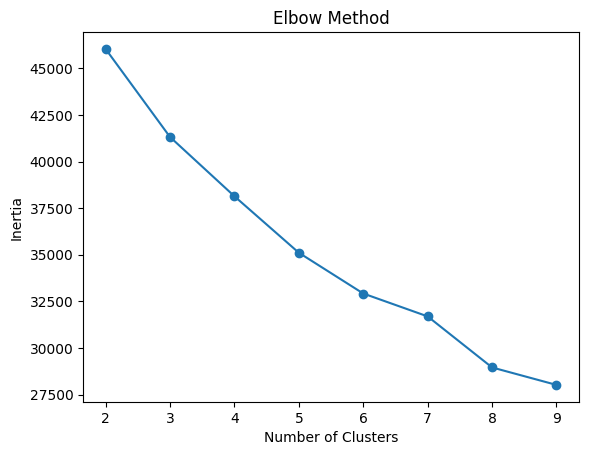

In [36]:
inertia = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [38]:
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    print(k, round(silhouette_score(X_scaled, labels), 4))

2 0.2214
3 0.1672
4 0.1451
5 0.1498
6 0.156
7 0.1497
8 0.173
9 0.1756


## Training Models

In [39]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df_fe["Cluster"] = clusters

In [40]:
cluster_profile = df_fe.groupby("Cluster").mean()
cluster_profile

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,purchase_ratio,balance_ratio,pay_vs_limit,ca_amount_per_trx
Cluster,,,,,,,,,,,,,,,,,,,,,
0,1422.028493,0.991849,974.320182,576.008708,398.538647,200.499333,0.746454,0.301672,0.562057,0.057877,...,18.074468,3624.744405,1092.111335,605.760464,0.020783,12.0,0.884153,0.530267,0.483685,51.099165
1,1366.972885,0.997031,93.811194,67.233727,26.936464,225.326462,0.114865,0.056306,0.059403,0.120026,...,1.798423,2136.092342,551.600521,498.300146,0.005137,12.0,0.346814,0.732402,0.322835,69.075968
2,1858.301892,0.977162,134.830914,80.510392,54.320522,1454.274389,0.138254,0.045405,0.089995,0.244154,...,2.391517,3734.910277,1274.391904,592.566247,0.026427,12.0,0.073721,0.556219,0.519441,322.670837
3,362.955704,0.950753,381.733083,131.625732,250.451911,27.956711,0.595728,0.081822,0.510782,0.010480,...,9.521161,3590.568319,536.949439,216.460888,0.061137,12.0,0.958117,0.145230,0.212854,9.535031


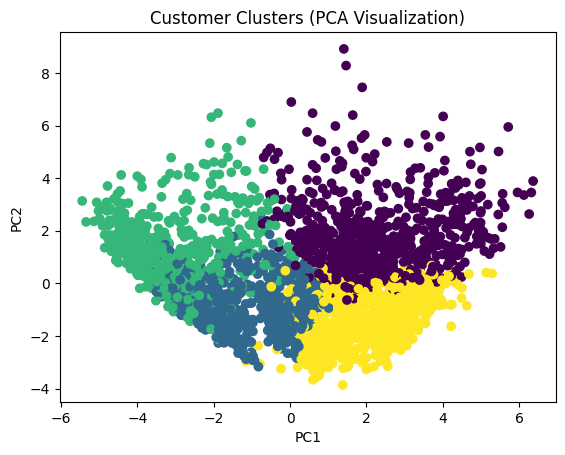

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

plt.scatter(components[:,0], components[:,1], c=clusters, cmap='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Customer Clusters (PCA Visualization)")
plt.show()


## Ringkasan Hasil Clustering

| Cluster | Ciri Utama Pelanggan | Perilaku Pembelian | Risiko / Peluang | Insight Bisnis |
|--------|------------------------|---------------------|------------------|-----------------|
| 0 | Pendapatan menengah, aktivitas transaksi stabil | Pengeluaran moderat, jarang menunggak | Risiko rendah | Cocok untuk program loyalitas reguler |
| 1 | Pendapatan tinggi, frequent spender | Belanja besar, pembayaran lancar | Risiko sangat rendah | Target utama promosi premium & cross-selling |
| 2 | Pendapatan rendah-menengah, riwayat menunggak | Pembayaran sering terlambat, pengeluaran kecil | Risiko tinggi | Perlukan reminder pembayaran & skema cicilan |
| 3 | Pelanggan baru / minim transaksi | Data transaksi sedikit | Risiko tidak diketahui | Butuh nurturing & edukasi produk |
| 4 | Pengguna aktif dengan pola belanja fluktuatif | Spending naik-turun, kadang terlambat | Risiko menengah | Butuh monitoring & promo stabilisasi |
